# Clustering Using PCA + KMeans

In this short notebook I will provide an example for how we can use Principal Component Analysis (PCA) and KMeans Clustering to find natural groups in a given dataset. 

In [8]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.datasets import make_blobs
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

We start by creating an exemplary dataset that comprises 1000 samples, each of which falls into one of three clusters. To make visualizations possible I restrict the feature space to three dimensions. However, keep in mind that dimension reduction techniques like PCA will be particularly useful in cases in which we have to deal with large feature spaces.

In [24]:
# Create exemplary dataset
X_3d, y = make_blobs(
    n_samples = 1000,
    n_features = 3,
    centers = 3,
    cluster_std = 3,
    random_state = 0
)

Let's take a look on our data in the three dimensional space.

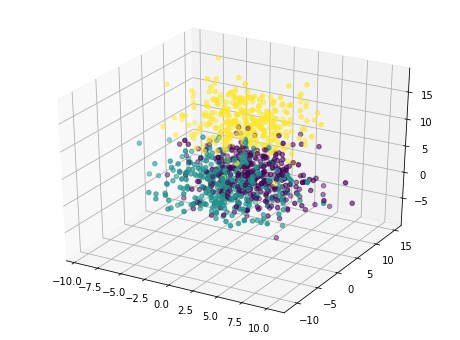

In [27]:
# Show 3-dimensional data
fig = plt.figure(figsize = (8, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_3d[:,0], X_3d[:,1], X_3d[:,2], c=y)
plt.show()

Now we use PCA to reduce the feature space from three to two dimensions. In this particular example it spends less value since the original feature space is already small. But there might be cases where we have to deal with data sets that provide hundreds or thousands of features. In these cases PCA might help to find more robust and less noisy groups when we apply a clustering algorithm like KMeans.

In [35]:
# Reduce to 2-dimensional space using PCA
pca = PCA(n_components = 2)
X_2d = pca.fit_transform(X_3d)

Let's take a look at our clusters in the two dimensional space.

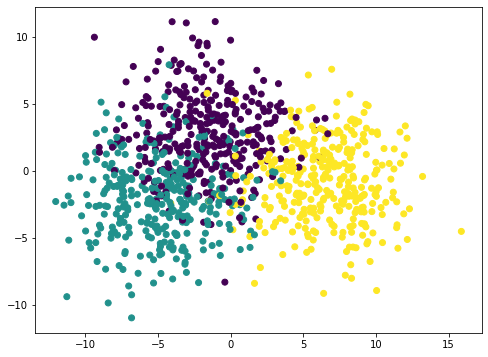

In [36]:
# Show 2-dimensional data
fig = plt.figure(figsize = (8, 6))
ax = fig.add_subplot(111)
ax.scatter(X_2d[:,0], X_2d[:,1], c=y)
plt.show()

Finally, we can use a clustering algorithm like KMeans to find the natural groupings in the data. For the illustration purpose of this notebook, we will fit the KMeans model on the two dimensional data.

In [37]:
# Find clusters using KMeans
kmeans = KMeans(n_clusters=3)
kmeans_2d_cluster_assignments = kmeans.fit_transform(X_2d).argmin(axis=1)

Let's take a look on the clusters provided by KMeans in the three dimensional space as well as in the two dimensional space.

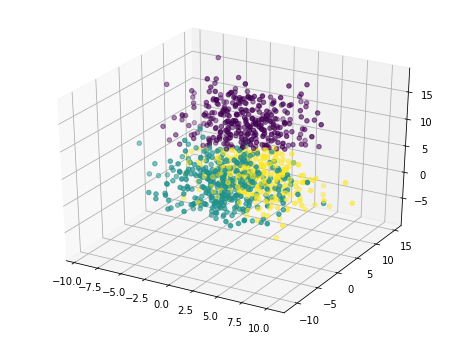

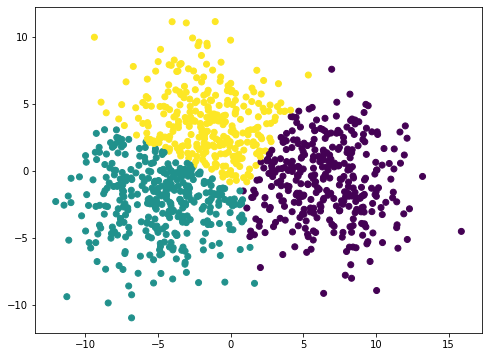

In [38]:
# Show 3-dimensional data
fig = plt.figure(figsize = (8, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_3d[:,0], X_3d[:,1], X_3d[:,2], c=kmeans_2d_cluster_assignments)
plt.show()

# Show 2-dimensional data
fig = plt.figure(figsize = (8, 6))
ax = fig.add_subplot(111)
ax.scatter(X_2d[:,0], X_2d[:,1], c=kmeans_2d_cluster_assignments)
plt.show()